In [1]:

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils
from pathlib import Path
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}, {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")


✅ Using device: cuda, NVIDIA GeForce RTX 4050 Laptop GPU


In [2]:
data_split_dir = Path("../data/splits") 

print("Available folders:", [d.name for d in data_split_dir.iterdir() if d.is_dir()])


Available folders: ['test', 'train', 'val']


In [3]:

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [4]:

train_dataset = datasets.ImageFolder(root=data_split_dir / "train", transform=train_transforms)
val_dataset   = datasets.ImageFolder(root=data_split_dir / "val", transform=val_test_transforms)
test_dataset  = datasets.ImageFolder(root=data_split_dir / "test", transform=val_test_transforms)

print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")
print("Classes:", train_dataset.classes)


Train: 37996, Val: 10849, Test: 5459
Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites

In [5]:

batch_size = 32  

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

print("✅ DataLoaders are ready!")


✅ DataLoaders are ready!


In [6]:
# ===============================
# 6. Visualization Functions
# ===============================
def imshow(img, title=None):
    """Show a tensor image after un-normalizing"""
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3,1,1) + torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
    img = torch.clamp(img, 0, 1)
    np_img = img.numpy().transpose((1,2,0))
    plt.figure(figsize=(4,4))
    plt.imshow(np_img)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()


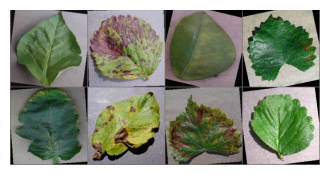

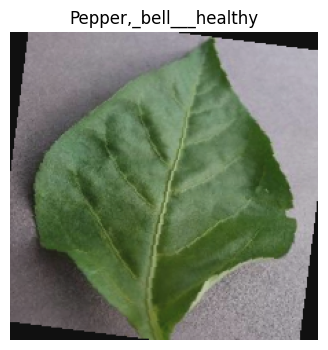

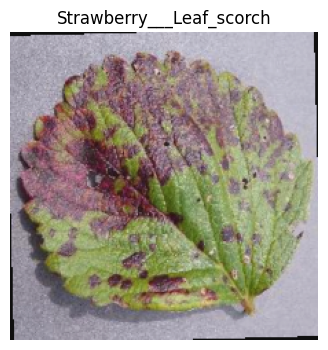

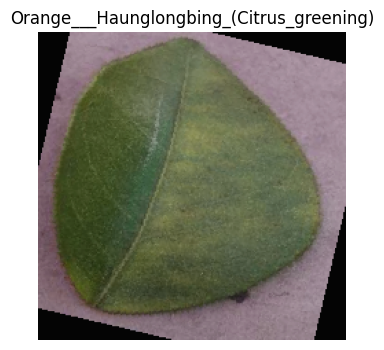

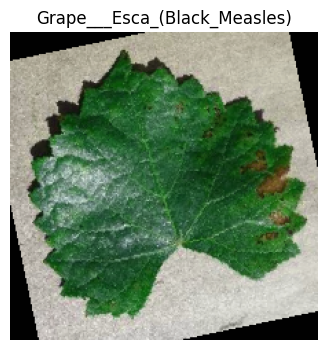

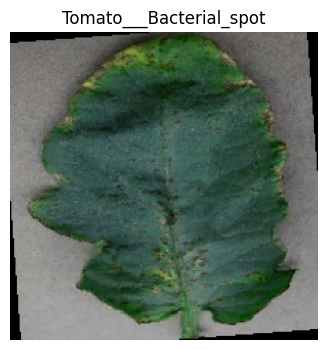

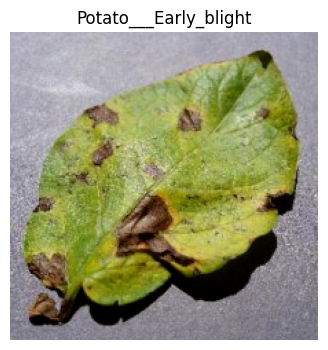

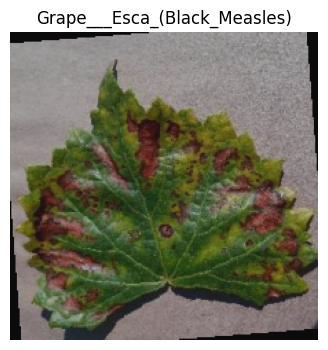

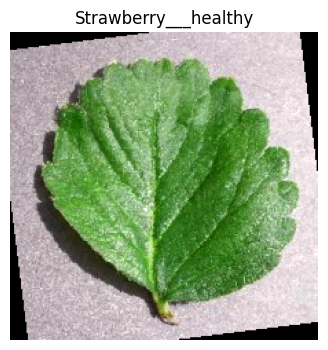

In [7]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.cpu()

imshow(utils.make_grid(images[:8], nrow=4))

classes = train_dataset.classes
for i in range(8):
    imshow(images[i], title=classes[labels[i]])
